# 0811_Study

## 대회 소개
### title: CommonLit - Evaluate Student Summaries
📢 **Automatically assess summaries written by students in grades 3-12**

이 대회의 목적은 3-12학년 학생들이 작성한 요약의 품질을 평가하는 것입니다. 참가자는 원문의 주요 내용 및 세부사항, 요약의 언어의 명확성, 정밀성 및 유창성을 얼마나 잘 나타내는지 평가하는 모델을 만들 것입니다. 모델 학습을 위해 실제 학생 요약 모음에 접근할 수 있습니다.

이 작업은 교사들이 학생 작품의 품질을 평가하는 데 도움을 주며, 학습 플랫폼이 학생들에게 즉각적인 피드백을 제공하는 데에도 도움이 될 것입니다

---

요약(Summary writing)은 모든 연령대의 학습자에게 중요한 기술입니다. 요약은 특히 제 2 언어 학습자와 학습 장애가 있는 학생의 독해력을 향상시킵니다. 요약 글쓰기는 또한 비판적 사고를 촉진하며 작문 능력을 향상시키는 가장 효과적인 방법 중 하나입니다. 하지만 요약문을 평가하고 피드백을 제공하는 것은 교사에게 시간 집약적인 과정이 될 수 있기 때문에 학생들은 이 기술을 연습할 기회가 충분하지 않습니다. 대규모 언어 모델(LLM)과 같은 혁신적인 기술을 사용하면 교사가 이러한 솔루션을 사용하여 요약을 빠르게 평가할 수 있으므로 이러한 상황을 개선하는 데 도움이 될 수 있습니다.

논증 또는 서술형 글쓰기에 대한 자동 채점 등 학생의 글쓰기를 자동으로 평가하는 기술이 발전해 왔습니다. 그러나 이러한 기존 기술은 요약 글쓰기에 잘 적용되지 않습니다. 요약을 평가하면 모델이 학생의 글과 하나의 긴 소스 텍스트를 모두 고려해야 하는 복잡성이 추가됩니다. 현재 요약 평가를 위한 몇 가지 기법이 있지만, 이러한 모델은 역사적으로 이러한 유형의 데이터 세트가 부족했기 때문에 실제 학생의 글보다는 자동으로 생성된 요약을 평가하는 데 중점을 두는 경우가 많았습니다.

대회 주최사인 CommonLit은 비영리 교육 기술 단체입니다. CommonLit은 모든 학생, 특히 타이틀 I 학교의 학생들이 대학과 그 이후에서 성공하는 데 필요한 읽기, 쓰기, 의사소통 및 문제 해결 능력을 갖추고 졸업할 수 있도록 최선을 다하고 있습니다. 학습 기관 연구소, 밴더빌트 대학교, 조지아 주립 대학교가 이 사명을 위해 CommonLit에 동참하고 있습니다.

요약 채점 알고리즘을 개발하는 데 도움을 주신 결과, 교사와 학생 모두 이 기본 기술을 증진하는 귀중한 도구를 얻게 될 것입니다. 학생들은 요약 연습을 할 기회가 더 많아지는 동시에 독해력, 비판적 사고력, 작문 능력을 향상시킬 수 있습니다.

# CommonLit | TF-IDF & XGB Baseline

## Definition of TF-IDF
- TF-IDF(Term Frequency - Inverse Document Frequency) 
- 1972년에 간단한 방법으로 글의 키워드를 추출하는 방법으로 제안되었다. 글에서 여러번 반복되는 단어가 있다면 그 단어가 키워드일 확률이 높을 것이다. 여기까지가 TF(Term Freuquency)에 해당하는 부분이다. 
- 하지만 단순히 등장 빈도로만 센다면 '이','그','저' 등 큰 의미 없는 단어만 뽑힐 것이다. 글의 키워드를 찾으려면 모든 글에 많이 등장하는 단어가 아니라 그 글에만 많이 등장하는 단어를 찾아야 한다. 이를 위해 IDF(Inverse Document Frequency)가 사용된다. 
- TF-IDF는 각 글마다 "그 단어가 그 글에서 등장하는 빈도인 TF"와 "(전체 글의 개수)를 (그 단어가 등장한 글의 개수)로 나눈 것의 로그값인 IDF"를 곱하여 점수를 매기고, 이 값이 가장 큰 단어를 뽑아 키워드로 삼는다. 아래 수식에서는 $w$는 $i$의 첫번쨰 단어가 $j$번째 글에서 등장한 빈도, $N$은 전체 글의 개수, $df$는 $i$번째 단어가 등장한 글의 개수를 의미한다.
$$ w_{i,j} = {tf}_{i,j} * log {N / {df}_i}$$
- 이렇게 하면 '이','그','저' 같은 단어는 많은 글에서 TF 값은 크게 나오겠지만 IDF 값은 0에 가까울 것이기 때문에 TD-IDF 점수 자체는 매우 낮아 키워드로 뽑히지 않을 것이다. 대신 해당 글에 여러 번 등장하고, 다른 글에선 많이 등장하지 않는 단어라면 TF값과 IDF 값 모두 커서 키워드로 뽑히게 될 것이다. 
---
- 출처: https://brunch.co.kr/@yeounyi/33




## Definition of XGBoost
- XGBoost는 Gradient Tree Boosting이다
    - XGBoost는 기본 학습기(Base Learner)를 의사 결정 나무로 하며 Gradient Boosting과 같이 gradient(잔차)를 이용하여 이전 모형의 약점을 보완하는 방식으로 학습한다. 
- XGBoost는 과적합 방지를 위한 기법이 추가된 알고리즘이다
    - XGBoost는 Gradient Tree Boosting에 과적합 방지를 하기 위한 파라미터$(\lambda, \gamma)$가 추가 된 알고리즘이다.

### Gradient Boosting
- Gradient Boosting은 잔차를 이용해서 이전 모형의 약점을 보완한다
    - 먼저 우리들에게 데이터 $(x_i, y_i), i = 1,...,n$가 있다. $x_i$는 $p$차원의 벡터, $y_i$는 실수이다.(범주형은 정수로 표현될수 있으므로 여기에 포함된다)
    
    - 이전 모형(예측함수)를 $F_{prev}$라 하고 개별 입력변수 $x_i$에 대한 예측값을 $F_{prev}(x_i)라 하자. *이전 모형의 약점이라함은 이전 모형이 실제값 $y_i$를 정확하게 예측하지 못한 정도라고 생각하면 된다.* 즉, 예측값과 실제값의 차이가 커지면 이전 모형의 약점은 치명적이 되는 것이다. 이것은 실제값과 예측값의 차이, 잔차와 연결된다. 
    
    - 이전 모형의 약점을 보완하는 것이 Gradient Boosting이라고 했다. 그렇다면 어떻게 보완할 수 있다는 것일까? *그것은 바로 실제값과 에측값의 차이를 줄여주는 함수 $h$를 찾는 것이다.* 
     
        > $y_1 = F_{prev}(x_1) + h(x_1) 
          ... 
          y_n = F_{prev}(x_n) + h(x_n)$ 
    - 다시말해 위 식처럼 $h$를 찾으면 새로운 에측함수 값은 $F_{new}(x) = F_{new}(x) + lh(x)$가 된다. 
    $(0 < l < 1 )$, l은 학습률이다. 
    
    - 아래에서 이전 모형의 예측값을 빨간 선이라고 해보자.(좌측상단) 그러고 나서 실제값과 예측값의 차이를 줄여주는 $h$를 학습하게 된다.(우측상단) 이때 새로운 예측값을 $F_{prev}(x) + h(x)$ 을 할수도 있다.(우측하단) 하지만 이 경우 과적합이 발생할수 있어서 잔차를 많이 줄이는 대신(하지만 이전모형보다는 잔차가 작아짐) 학습률 $l$을 $h(x)$에 곱한 값을 이전 모형의 예측값에 더하여 새로운 예측값 $F_{new}(x) = F_{prev}(x) + lh(x)를 얻게 된다(좌측 하단그림)
    >    ![gradient boosting의 원리](graph.png)
- Gradient Boosting은 순차적으로 적합한되 이들을 선형결합한 모형을 생성한다. 
    - 앞에서 Gradient Boosting은 순차적으로 이전 모형의 약점을 보완하는 모형을 만들게 된다. 순차적으로 적합할 모형 개수를 $m$이라 하자. 첫번째(시작) 모형의 에측값을 $F_0(x) = h_0(x)$라 하면 최종 모형 $F_m$은 다음과 같이 $h_j$들의 선형 결합으로 만들어 진다: 
    > $F_m(x) = h_0(x) + lh_1(x) + ... + lh_m(x)$
    ---
    - 출처 : https://zephyrus1111.tistory.com/232


## 1. Libraries

In [14]:
import os
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings('ignore')

In [15]:
class config:
    sample_submission_path = '/kaggle/input/commonlit-evaluate-student-summaries/sample_submission.csv'
    prompts_train_path = '/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv'
    summaries_test_path = '/kaggle/input/commonlit-evaluate-student-summaries/summaries_test.csv'
    summaries_train_path = '/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv'
    prompts_test_path = '/kaggle/input/commonlit-evaluate-student-summaries/prompts_test.csv'

## 2. Loading Data
- 총 데이터 파일 수: 5개
- input으로 사용할 파일: 4개
    - prompts_train 
    - summaries_test 
    - summaries_train 
    - prompts_test
- prompts_* 를 summary한 것이 summarise_*
- prompts_test를 summarize하여 summarise_test에 넣고, 그에 따른 content와 wording에 대한 결과를 submission file에 넣으면 됨

In [16]:
sample_submission = pd.read_csv(config.sample_submission_path)
prompts_train = pd.read_csv(config.prompts_train_path)
summaries_test = pd.read_csv(config.summaries_test_path)
summaries_train = pd.read_csv(config.summaries_train_path)
prompts_test = pd.read_csv(config.prompts_test_path)

print(f'sample_submission shape: {sample_submission.shape}')
print(f'prompts_train shape: {prompts_train.shape}')
print(f'summaries_test shape: {summaries_test.shape}')
print(f'summaries_train shape: {summaries_train.shape}')
print(f'prompts_test shape: {prompts_test.shape}')
print('-'*90)
print(f'sample_submission missing values: {sample_submission.isnull().sum().sum()}')
print(f'prompts_train missing values: {prompts_train.isnull().sum().sum()}')
print(f'summaries_test missing values: {summaries_test.isnull().sum().sum()}')
print(f'summaries_train missing values: {summaries_train.isnull().sum().sum()}')
print(f'prompts_test missing values: {prompts_test.isnull().sum().sum()}')
print('-'*90)
summaries_train.head()

sample_submission shape: (4, 3)
prompts_train shape: (4, 4)
summaries_test shape: (4, 3)
summaries_train shape: (7165, 5)
prompts_test shape: (2, 4)
------------------------------------------------------------------------------------------
sample_submission missing values: 0
prompts_train missing values: 0
summaries_test missing values: 0
summaries_train missing values: 0
prompts_test missing values: 0
------------------------------------------------------------------------------------------


,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [25]:
prompts_train.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [26]:
prompts_test.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,abc123,Summarize...,Example Title 1,Heading\nText...
1,def789,Summarize...,Example Title 2,Heading\nText...


In [27]:
summaries_test.head()

,student_id,prompt_id,text,text_length,text_word_cnt,text_stopword_cnt,text_punct_cnt,text_number_cnt,tfidf_able,tfidf_according,...,tfidf_well,tfidf_whenever,tfidf_white,tfidf_whole,tfidf_work,tfidf_worked,tfidf_workers,tfidf_working,tfidf_would,tfidf_write
0,000000ffffff,abc123,Example text 1,14,3,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,111111eeeeee,def789,Example text 2,14,3,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,222222cccccc,abc123,Example text 3,14,3,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,333333dddddd,def789,Example text 4,14,3,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
sample_submission

,student_id,content,wording
0,000000ffffff,-1.634779,-1.571156
1,111111eeeeee,-1.634779,-1.571156
2,222222cccccc,-1.634779,-1.571156
3,333333dddddd,-1.634779,-1.571156


## 3. Target Distribution
- target이 content, wording 둘을 맞추는 것.
    - content - The content score for the summary. The first target.
    - wording - The wording score for the summary. The second target.
- contetn와 wording의 의미
    - content는 학생이 원문의 주요 아이디어를 어떻게 포착했는지에 대한 요약을 평가하고 wording은 언어 구조의 품질에 대한 표현을 평가한다고 가정해 보겠습니다. 간단히 말해서, content는 매우 낮은 점수 (원문의 아이디어를 포착하지 못함)를 가질 수 있지만 wording은 높은 표현 (텍스트가 구조적으로 잘 작성됨)을 가질 수 있습니다.
    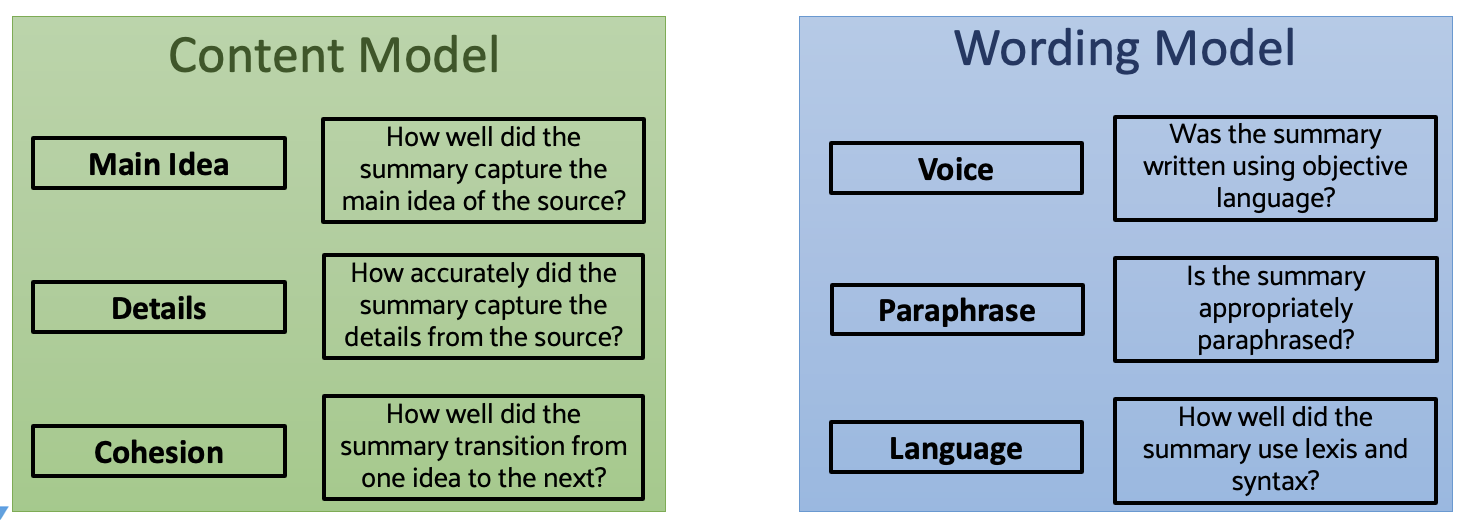


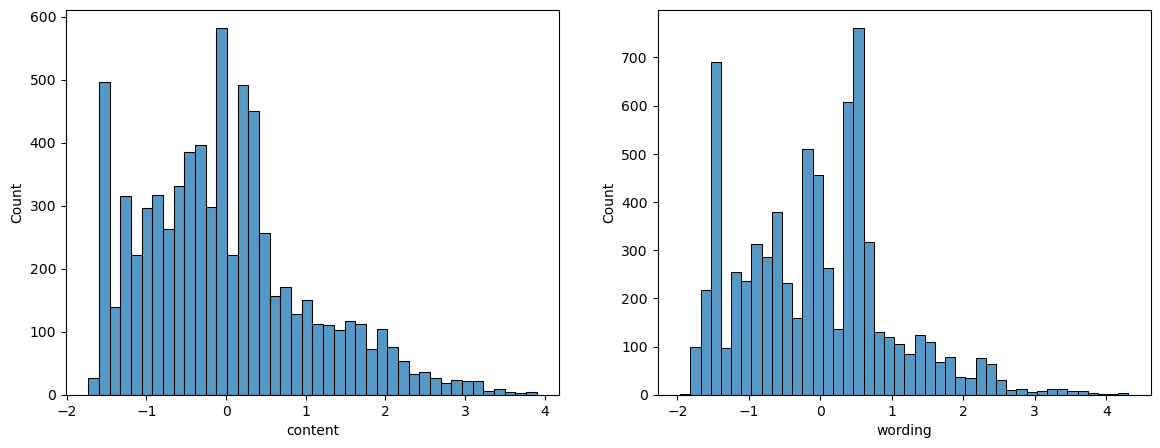

In [17]:
plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=summaries_train, x='content')
plt.subplot(1, 2, 2)
sns.histplot(data=summaries_train, x='wording')
plt.show()

## 4. Feature Engineering

In [18]:
def clean_text(text: str) -> str:
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

def count_total_words(text: str) -> int:
    words = text.split()
    total_words = len(words)
    return total_words

def count_stopwords(text: str) -> int:
    stopword_list = set(stopwords.words('english'))
    words = text.split()
    stopwords_count = sum(1 for word in words if word.lower() in stopword_list)
    return stopwords_count

def count_punctuation(text: str) -> int:
    punctuation_set = set(string.punctuation)
    punctuation_count = sum(1 for char in text if char in punctuation_set)
    return punctuation_count

def count_numbers(text: str) -> int:
    numbers = re.findall(r'\d+', text)
    numbers_count = len(numbers)
    return numbers_count

def feature_engineer(dataframe: pd.DataFrame, feature: str = 'text') -> pd.DataFrame:
    dataframe[f'{feature}_length'] = dataframe[feature].apply(lambda x: len(x))
    dataframe[f'{feature}_word_cnt'] = dataframe[feature].apply(lambda x: count_total_words(x))
    dataframe[f'{feature}_stopword_cnt'] = dataframe[feature].apply(lambda x: count_stopwords(x))
    dataframe[f'{feature}_punct_cnt'] = dataframe[feature].apply(lambda x: count_punctuation(x))
    dataframe[f'{feature}_number_cnt'] = dataframe[feature].apply(lambda x: count_numbers(x))
    return dataframe

In [19]:
summaries_train = feature_engineer(summaries_train)
summaries_test = feature_engineer(summaries_test)

In [20]:
vectorizer = TfidfVectorizer(encoding='utf-8',
                             ngram_range=(1, 1),
                             lowercase=True,
                             stop_words=list(stopwords.words('english')),
                             max_features=250)

train_vectorized = pd.DataFrame(
                vectorizer.fit_transform(summaries_train['text']).toarray(),
                columns=[f"tfidf_{str(f)}" for f in vectorizer.get_feature_names_out()],
            )

test_vectorized = pd.DataFrame(
                vectorizer.transform(summaries_test['text']).toarray(),
                columns=[f"tfidf_{str(f)}" for f in vectorizer.get_feature_names_out()],
            )

summaries_train = pd.concat([summaries_train, train_vectorized], axis=1)

summaries_test = pd.concat([summaries_test, test_vectorized], axis=1)

summaries_train.head()

,student_id,prompt_id,text,content,wording,text_length,text_word_cnt,text_stopword_cnt,text_punct_cnt,text_number_cnt,...,tfidf_well,tfidf_whenever,tfidf_white,tfidf_whole,tfidf_work,tfidf_worked,tfidf_workers,tfidf_working,tfidf_would,tfidf_write
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,346,61,25,3,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,244,52,30,2,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.252892,0.0,0.425880,0.000000
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,1370,235,98,38,0,...,0.089862,0.0,0.0,0.0,0.091531,0.0,0.090915,0.0,0.306210,0.116408
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,157,25,11,6,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,1225,203,92,30,3,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.159293,0.000000


In [21]:
features = summaries_train.drop(columns = ['student_id', 'prompt_id', 'text', 'content', 'wording'], axis = 1).columns

## 5. Modeling

In [30]:
N_FOLDS = 10
SEED = 42
NUM_ROUNDS = 5000
EARLY_STOPPING_ROUNDS = 500
VERBOSE = 500

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'sampling_method': 'uniform',
    'tree_method': 'gpu_hist',
    'learning_rate': 0.008,
    'max_depth': 6,
    'subsample': 0.78,
    'min_child_weight': 5
    
}

for target in ['content', 'wording']:
    X = summaries_train[features]
    y = summaries_train[target]
    X_test = summaries_test[features]
    y_test = np.zeros(shape=summaries_test.shape[0], dtype=float)
    dtest = xgb.DMatrix(data=X_test)
    
    cv = KFold(n_splits = N_FOLDS, shuffle = True, random_state = SEED)
    for idx, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        print(f"| Target: {target} - Fold {idx+1} |".center(80, "-"))
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[val_idx]
        y_val = y.iloc[val_idx]
        print(f'train: {X_train.shape}')
        print(f'val: {X_val.shape}')
        dtrain = xgb.DMatrix(data=X_train, label=y_train)
        dval = xgb.DMatrix(data=X_val, label=y_val)
        
        model = xgb.train(params=params,
                          dtrain=dtrain,
                          evals=[(dtrain, 'train'), (dval, 'validation')],
                          num_boost_round=NUM_ROUNDS,
                          early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                          verbose_eval=VERBOSE)
        
        y_test += model.predict(dtest) / N_FOLDS
    sample_submission[target] = y_test

--------------------------| Target: content - Fold 1 |--------------------------
train: (6448, 255)
val: (717, 255)
[0]	train-rmse:1.15490	validation-rmse:1.16615
[500]	train-rmse:0.38512	validation-rmse:0.46151
[1000]	train-rmse:0.33666	validation-rmse:0.44807
[1500]	train-rmse:0.30922	validation-rmse:0.44431
[2000]	train-rmse:0.28824	validation-rmse:0.44270
[2500]	train-rmse:0.27011	validation-rmse:0.44219
[2741]	train-rmse:0.26203	validation-rmse:0.44237
--------------------------| Target: content - Fold 2 |--------------------------
train: (6448, 255)
val: (717, 255)
[0]	train-rmse:1.15622	validation-rmse:1.15376
[500]	train-rmse:0.38420	validation-rmse:0.46781
[1000]	train-rmse:0.33784	validation-rmse:0.45144
[1500]	train-rmse:0.30992	validation-rmse:0.44590
[2000]	train-rmse:0.28876	validation-rmse:0.44311
[2500]	train-rmse:0.27109	validation-rmse:0.44139
[3000]	train-rmse:0.25611	validation-rmse:0.44096
[3500]	train-rmse:0.24237	validation-rmse:0.44048
[4000]	train-rmse:0.23019	

In [32]:
sample_submission.to_csv('submission1.csv', index=False)

In [31]:
sample_submission

,student_id,content,wording
0,000000ffffff,-1.634779,-1.571156
1,111111eeeeee,-1.634779,-1.571156
2,222222cccccc,-1.634779,-1.571156
3,333333dddddd,-1.634779,-1.571156
